Preprocessed 9248 train images.
Preprocessed 973 validation images.
Preprocessed 973 test images.
Shape of processed data: (9248, 128, 128, 3)
289/289 ━━━━━━━━━━━━━━━━━━━━ 105s 359ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 11s 342ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 10s 318ms/step
Extracted train features shape: (9248, 4, 4, 2048)
Flattened train features shape: (9248, 32768)
Number of components chosen to retain 80% variance: 35
Reduced train features shape: (9248, 35)
Reduced validation features shape: (973, 35)
Reduced test features shape: (973, 35)


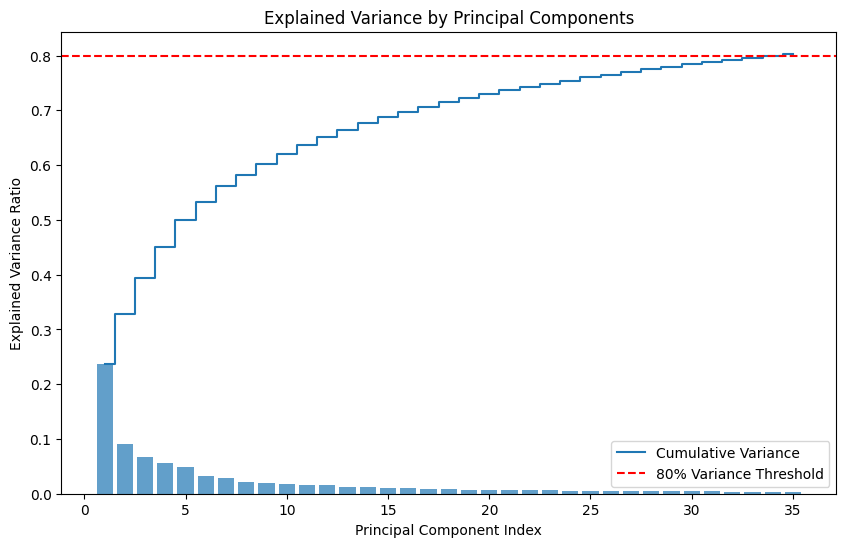

In [2]:
%run preprocessing.ipynb

In [4]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Initialize the SVM model
svm_model = SVC(kernel='linear', random_state=42)

# Train the SVM model
svm_model.fit(features_train_flat, train_labels_encoded)

# Evaluate on the validation set
val_predictions = svm_model.predict(features_val_flat)
val_accuracy = accuracy_score(val_labels_encoded, val_predictions)

print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

Validation Accuracy: 75.64%


In [5]:
# Predict on the test set
test_predictions = svm_model.predict(features_test_flat)

# Calculate accuracy
test_accuracy = accuracy_score(test_labels_encoded, test_predictions)

# Generate a classification report
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print("Classification Report:")
print(classification_report(test_labels_encoded, test_predictions))

Test Accuracy: 76.98%
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.78      0.76       219
           1       0.91      0.88      0.89       237
           2       0.69      0.82      0.75       262
           3       0.77      0.61      0.68       255

    accuracy                           0.77       973
   macro avg       0.78      0.77      0.77       973
weighted avg       0.78      0.77      0.77       973



### Neural Network

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, classification_report

from tensorflow.keras.utils import to_categorical

# Convert labels to one-hot encoding
train_labels_encoded_onehot = to_categorical(train_labels_encoded, num_classes=4)
val_labels_encoded_onehot = to_categorical(val_labels_encoded, num_classes=4)
test_labels_encoded_onehot = to_categorical(test_labels_encoded, num_classes=4)

# Verify the shape
print("Shape of one-hot encoded labels (train):", train_labels_encoded_onehot.shape)

# Define the NN architecture
nn_model = Sequential([
    Dense(512, activation='relu', input_shape=(features_train_flat.shape[1],)),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')  # 4 classes
])

# Compile the NN
nn_model.compile(optimizer=Adam(learning_rate=0.001),
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

# Train the NN with one-hot encoded labels
history = nn_model.fit(features_train_flat, train_labels_encoded_onehot,
                       epochs=20,
                       batch_size=32,
                       validation_data=(features_val_flat, val_labels_encoded_onehot),
                       verbose=1)

# Evaluate the NN on the test set
test_loss, test_accuracy = nn_model.evaluate(features_test_flat, test_labels_encoded_onehot, verbose=0)
print(f"Test Accuracy with NN: {test_accuracy * 100:.2f}%")

# Predict and generate a classification report
nn_predictions = nn_model.predict(features_test_flat)
nn_predicted_classes = nn_predictions.argmax(axis=1)
print("Classification Report (NN):")
print(classification_report(test_labels_encoded.argmax(axis=1), nn_predicted_classes))

Shape of one-hot encoded labels (train): (9248, 4)


/Users/birkstrandbjornaa/Documents/DatatekH24/it3212-data-driven-software/.venv/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
289/289 ━━━━━━━━━━━━━━━━━━━━ 19s 63ms/step - accuracy: 0.2644 - loss: 1.7153 - val_accuracy: 0.4245 - val_loss: 1.3075
Epoch 2/20
289/289 ━━━━━━━━━━━━━━━━━━━━ 18s 64ms/step - accuracy: 0.3268 - loss: 1.3456 - val_accuracy: 0.4502 - val_loss: 1.1923
Epoch 3/20
289/289 ━━━━━━━━━━━━━━━━━━━━ 18s 61ms/step - accuracy: 0.3300 - loss: 1.3266 - val_accuracy: 0.4532 - val_loss: 1.2121
Epoch 4/20
289/289 ━━━━━━━━━━━━━━━━━━━━ 18s 62ms/step - accuracy: 0.3592 - loss: 1.2949 - val_accuracy: 0.4132 - val_loss: 1.1755
Epoch 5/20
289/289 ━━━━━━━━━━━━━━━━━━━━ 17s 59ms/step - accuracy: 0.3491 - loss: 1.2876 - val_accuracy: 0.4615 - val_loss: 1.1929
Epoch 6/20
289/289 ━━━━━━━━━━━━━━━━━━━━ 19s 65ms/step - accuracy: 0.3584 - loss: 1.2936 - val_accuracy: 0.5355 - val_loss: 1.1082
Epoch 7/20
289/289 ━━━━━━━━━━━━━━━━━━━━ 18s 61ms/step - accuracy: 0.3967 - loss: 1.2562 - val_accuracy: 0.4923 - val_loss: 1.1345
Epoch 8/20
289/289 ━━━━━━━━━━━━━━━━━━━━ 18s 63ms/step - accuracy: 0.4125 - loss: 1.2338 - 

AxisError: axis 1 is out of bounds for array of dimension 1

### Random Forest

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the RF model
rf_model.fit(features_train_flat, train_labels_encoded)

# Predict on the validation set
val_predictions = rf_model.predict(features_val_flat)
val_accuracy = accuracy_score(val_labels_encoded, val_predictions)
print(f"Validation Accuracy with RF: {val_accuracy * 100:.2f}%")

# Evaluate on the test set
test_predictions = rf_model.predict(features_test_flat)
test_accuracy = accuracy_score(test_labels_encoded, test_predictions)
print(f"Test Accuracy with RF: {test_accuracy * 100:.2f}%")

# Generate a classification report
print("Classification Report (RF):")
print(classification_report(test_labels_encoded, test_predictions))

Validation Accuracy with RF: 76.57%
Test Accuracy with RF: 73.48%
Classification Report (RF):
              precision    recall  f1-score   support

           0       0.70      0.75      0.73       219
           1       0.88      0.85      0.86       237
           2       0.66      0.76      0.71       262
           3       0.72      0.59      0.65       255

    accuracy                           0.73       973
   macro avg       0.74      0.74      0.74       973
weighted avg       0.74      0.73      0.73       973



In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Generate learning curve data
train_sizes = np.linspace(0.1, 1.0, 10)  # Fractions of the training data
train_accuracies = []
val_accuracies = []

# Check the original label distribution
print("Original label distribution:", Counter(train_labels_encoded))

# Check the subset label distribution for each train size
for size in train_sizes:
    subset_X, _, subset_y, _ = train_test_split(
        features_train_flat, train_labels_encoded,
        train_size=size, stratify=train_labels_encoded, random_state=42
    )
    print(f"Label distribution for train size {size}: {Counter(subset_y)}")

# for size in train_sizes:
#     subset_size = int(size * len(features_train_flat))
#     X_train_subset = features_train_flat[:subset_size]
#     y_train_subset = train_labels_encoded[:subset_size]
    
#     # Train the SVM on the subset
#     svm_model.fit(X_train_subset, y_train_subset)
    
#     # Calculate training accuracy
#     train_predictions = svm_model.predict(X_train_subset)
#     train_accuracies.append(accuracy_score(y_train_subset, train_predictions))
    
#     # Calculate validation accuracy
#     val_predictions = svm_model.predict(features_val_flat)
#     val_accuracies.append(accuracy_score(val_labels_encoded, val_predictions))


# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_accuracies, label='Training Accuracy')
plt.plot(train_sizes, val_accuracies, label='Validation Accuracy')
plt.title('Learning Curve')
plt.xlabel('Training Dataset Size (Fraction)')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

Original label distribution: Counter({np.int64(2): 2512, np.int64(3): 2274, np.int64(1): 2271, np.int64(0): 2191})
Label distribution for train size 0.1: Counter({np.int64(2): 251, np.int64(1): 227, np.int64(3): 227, np.int64(0): 219})
Label distribution for train size 0.2: Counter({np.int64(2): 502, np.int64(3): 455, np.int64(1): 454, np.int64(0): 438})
Label distribution for train size 0.30000000000000004: Counter({np.int64(2): 754, np.int64(3): 682, np.int64(1): 681, np.int64(0): 657})
Label distribution for train size 0.4: Counter({np.int64(2): 1005, np.int64(3): 910, np.int64(1): 908, np.int64(0): 876})
Label distribution for train size 0.5: Counter({np.int64(2): 1256, np.int64(3): 1137, np.int64(1): 1136, np.int64(0): 1095})
Label distribution for train size 0.6: Counter({np.int64(2): 1507, np.int64(3): 1364, np.int64(1): 1362, np.int64(0): 1315})
Label distribution for train size 0.7000000000000001: Counter({np.int64(2): 1758, np.int64(3): 1592, np.int64(1): 1589, np.int64(0): 1

InvalidParameterError: The 'train_size' parameter of train_test_split must be a float in the range (0.0, 1.0), an int in the range [1, inf) or None. Got np.float64(1.0) instead.

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Generate learning curve data
train_sizes = np.linspace(0.1, 1.0, 10)  # Fractions of the training data
train_accuracies = []
val_accuracies = []

# Check the original label distribution
print("Original label distribution:", Counter(train_labels_encoded))

# Check the subset label distribution for each train size
for size in train_sizes:
    subset_X, _, subset_y, _ = train_test_split(
        features_train_flat, train_labels_encoded,
        train_size=size, stratify=train_labels_encoded, random_state=42
    )
    print(f"Label distribution for train size {size}: {Counter(subset_y)}")

# for size in train_sizes:
#     subset_size = int(size * len(features_train_flat))
#     X_train_subset = features_train_flat[:subset_size]
#     y_train_subset = train_labels_encoded[:subset_size]
    
#     # Train the SVM on the subset
#     svm_model.fit(X_train_subset, y_train_subset)
    
#     # Calculate training accuracy
#     train_predictions = svm_model.predict(X_train_subset)
#     train_accuracies.append(accuracy_score(y_train_subset, train_predictions))
    
#     # Calculate validation accuracy
#     val_predictions = svm_model.predict(features_val_flat)
#     val_accuracies.append(accuracy_score(val_labels_encoded, val_predictions))


# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_accuracies, label='Training Accuracy')
plt.plot(train_sizes, val_accuracies, label='Validation Accuracy')
plt.title('Learning Curve')
plt.xlabel('Training Dataset Size (Fraction)')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

Original label distribution: Counter({np.int64(2): 2512, np.int64(3): 2274, np.int64(1): 2271, np.int64(0): 2191})
Label distribution for train size 0.1: Counter({np.int64(2): 251, np.int64(1): 227, np.int64(3): 227, np.int64(0): 219})
Label distribution for train size 0.2: Counter({np.int64(2): 502, np.int64(3): 455, np.int64(1): 454, np.int64(0): 438})
Label distribution for train size 0.30000000000000004: Counter({np.int64(2): 754, np.int64(3): 682, np.int64(1): 681, np.int64(0): 657})
Label distribution for train size 0.4: Counter({np.int64(2): 1005, np.int64(3): 910, np.int64(1): 908, np.int64(0): 876})
Label distribution for train size 0.5: Counter({np.int64(2): 1256, np.int64(3): 1137, np.int64(1): 1136, np.int64(0): 1095})
Label distribution for train size 0.6: Counter({np.int64(2): 1507, np.int64(3): 1364, np.int64(1): 1362, np.int64(0): 1315})
Label distribution for train size 0.7000000000000001: Counter({np.int64(2): 1758, np.int64(3): 1592, np.int64(1): 1589, np.int64(0): 1

InvalidParameterError: The 'train_size' parameter of train_test_split must be a float in the range (0.0, 1.0), an int in the range [1, inf) or None. Got np.float64(1.0) instead.

### Below this is old

In [6]:
import numpy as np
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

In [7]:
# Assuming labels are integers, convert them to categorical (one-hot encoding)
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit the encoder to the labels and transform them
y_train = label_encoder.fit_transform(y_train)
y_val = label_encoder.transform(y_val)
y_test = label_encoder.transform(y_test)

num_classes = len(label_encoder.classes_)

# num_classes = len(np.unique(y_train))
y_train = to_categorical(y_train, num_classes)
y_val = to_categorical(y_val, num_classes)
y_test = to_categorical(y_test, num_classes)

NameError: name 'y_train' is not defined

In [ ]:
# Flatten the training, validation, and test data
X_train = X_train.reshape(X_train.shape[0], -1)
X_val = X_val.reshape(X_val.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define the model architecture
model = Sequential([
    Dense(512, activation='relu', input_shape=(49152,)),  # Input layer with shape of flattened features
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')  # Output layer with number of classes
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


/Users/birkstrandbjornaa/Documents/DatatekH24/it3212-data-driven-software/.venv/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Train the model
history = model.fit(X_train, y_train,
                    epochs=20,
                    batch_size=32,
                    validation_data=(X_val, y_val),
                    verbose=1)


Epoch 1/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 93ms/step - accuracy: 0.2052 - loss: 45.8033 - val_accuracy: 0.3776 - val_loss: 2.5966
Epoch 2/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 87ms/step - accuracy: 0.2804 - loss: 6.3337 - val_accuracy: 0.3980 - val_loss: 1.5879
Epoch 3/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 87ms/step - accuracy: 0.3308 - loss: 1.5918 - val_accuracy: 0.3827 - val_loss: 1.5667
Epoch 4/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 86ms/step - accuracy: 0.3656 - loss: 1.5611 - val_accuracy: 0.3776 - val_loss: 1.5357
Epoch 5/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 86ms/step - accuracy: 0.3692 - loss: 1.5789 - val_accuracy: 0.3827 - val_loss: 1.5091
Epoch 6/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 90ms/step - accuracy: 0.3802 - loss: 1.5173 - val_accuracy: 0.3827 - val_loss: 1.4860
Epoch 7/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 92ms/step - accuracy: 0.3205 - loss: 1.5069 - val_accuracy: 0.3827 - val_loss: 1.4684
Epoch 8/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step - accuracy: 0.3709 - loss: 1.4907 - val_accuracy: 0.3827 - 

In [ ]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


Test Accuracy: 40.61%


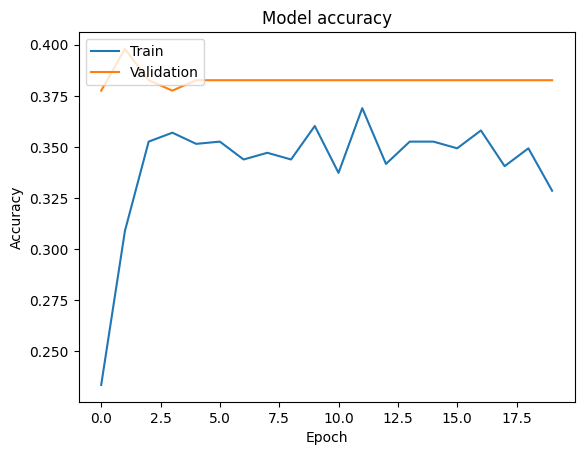

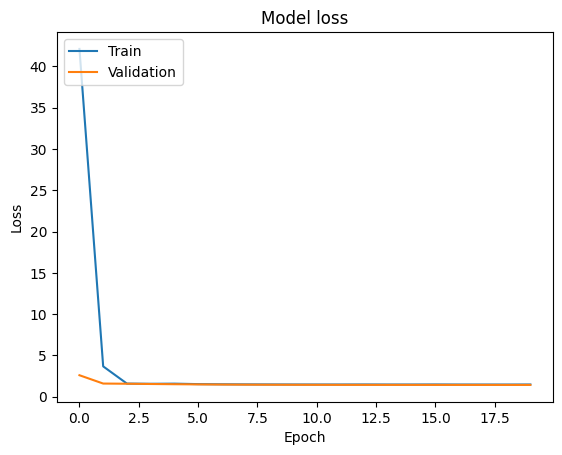

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()